# Logistict Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,KFold,cross_validate,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor

from sklearn.metrics import (
    mean_absolute_error,
    root_mean_squared_error,
    r2_score
)

In [2]:
# configuration
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: f"{x:.3f}")
sns.set_theme(style="darkgrid")

plt.rcParams.update({
    "axes.titlesize": 10,
    "axes.labelsize": 9,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8 
})

RANDOM_STATE = 42
CSV_PATH = "data/Default.csv"
TARGET_COL = "median_house_value"

In [3]:
df = pd.read_csv(CSV_PATH)

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  str    
 1   student  10000 non-null  str    
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), str(2)
memory usage: 312.6 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
balance,10000.000,835.375,483.715,0.000,481.731,823.637,1166.308,2654.323
income,10000.000,33516.982,13336.640,771.968,21340.463,34552.645,43807.729,73554.233


In [6]:
df.columns

Index(['default', 'student', 'balance', 'income'], dtype='str')

In [7]:
df['default'].value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

In [8]:
df['student'].value_counts()

student
No     7056
Yes    2944
Name: count, dtype: int64

In [9]:
df.head()

,default,student,balance,income
0,No,No,729.526,44361.625
1,No,Yes,817.180,12106.135
2,No,No,1073.549,31767.139
3,No,No,529.251,35704.494
4,No,No,785.656,38463.496


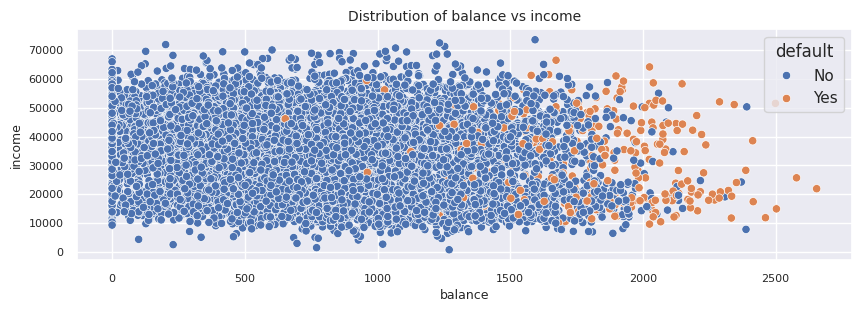

In [ ]:

plt.figure(figsize=(10, 3))
sns.scatterplot(data=df, x='balance', y='income', hue='default')
plt.title(f"Distribution of balance vs income")
plt.show()

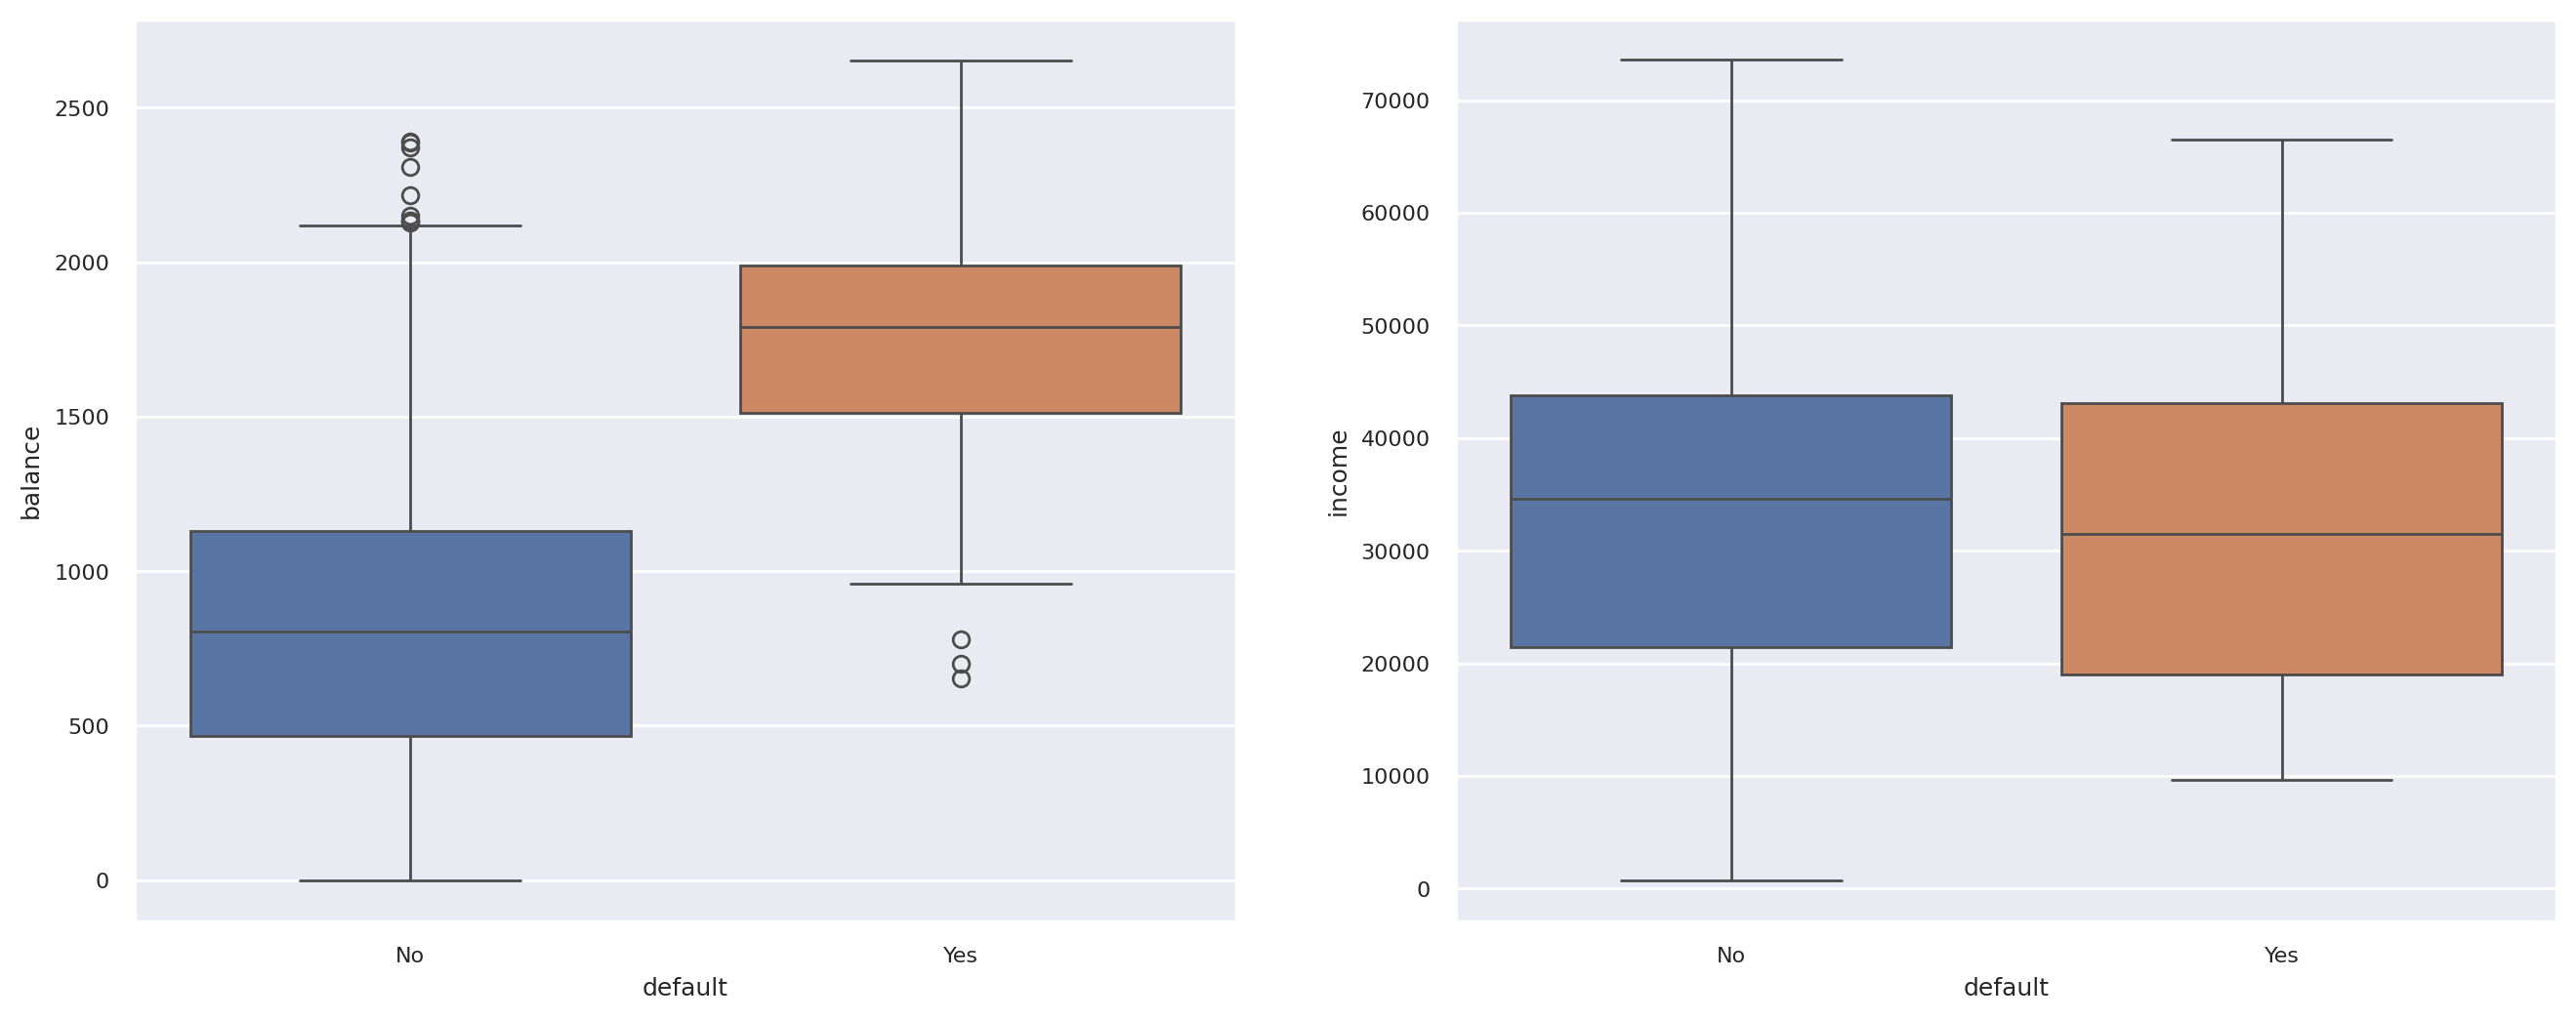

In [16]:
fig, ax = plt.subplots(1,2, figsize=(16,6), dpi= 200)
for ax, col in zip(ax, ["balance", "income"]):
    sns.boxplot(data = df, x = "default", y = col, ax = ax, hue = "default")